#  Student Placement Analysis: Visualizing Success Factors in Campus Hiring

![Alternative Text](image.png)

## Data Loading and Initial Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('collegePlace.csv')

In [2]:
print(df.head())

   Age  Gender                         Stream  Internships  CGPA  Hostel  \
0   22    Male  Electronics And Communication            1     8       1   
1   21  Female               Computer Science            0     7       1   
2   22  Female         Information Technology            1     6       0   
3   21    Male         Information Technology            0     8       0   
4   22    Male                     Mechanical            0     8       1   

   HistoryOfBacklogs  PlacedOrNot  
0                  1            1  
1                  1            1  
2                  0            1  
3                  1            1  
4                  0            1  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB
None


In [4]:
print(df.describe())

               Age  Internships         CGPA       Hostel  HistoryOfBacklogs  \
count  2966.000000  2966.000000  2966.000000  2966.000000        2966.000000   
mean     21.485840     0.703641     7.073837     0.269049           0.192178   
std       1.324933     0.740197     0.967748     0.443540           0.394079   
min      19.000000     0.000000     5.000000     0.000000           0.000000   
25%      21.000000     0.000000     6.000000     0.000000           0.000000   
50%      21.000000     1.000000     7.000000     0.000000           0.000000   
75%      22.000000     1.000000     8.000000     1.000000           0.000000   
max      30.000000     3.000000     9.000000     1.000000           1.000000   

       PlacedOrNot  
count  2966.000000  
mean      0.552596  
std       0.497310  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


## Data Cleaning

In [5]:
print(df.isnull().sum())

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64


In [6]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 1829


In [7]:
df = df.drop_duplicates()

In [8]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 0


In [9]:
print(df['Gender'].unique())
print(df['Hostel'].unique())
print(df['HistoryOfBacklogs'].unique())
print(df['Stream'].unique())

['Male' 'Female']
[1 0]
[1 0]
['Electronics And Communication' 'Computer Science'
 'Information Technology' 'Mechanical' 'Electrical' 'Civil']


In [10]:
categorical_cols = ['Gender', 'Stream', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [16]:
# Check dtypes
print(df.dtypes)

# Ensure 'PlacedOrNot' is numeric (int)
df['PlacedOrNot'] = df['PlacedOrNot'].astype(int)

# Group by 'Gender' and calculate mean of 'PlacedOrNot' only
placement_rate_gender = df.groupby('Gender')['PlacedOrNot'].mean()

print(placement_rate_gender)


Age                     int64
Gender               category
Stream               category
Internships             int64
CGPA                    int64
Hostel               category
HistoryOfBacklogs    category
PlacedOrNot          category
dtype: object
Gender
Female    0.549828
Male      0.589835
Name: PlacedOrNot, dtype: float64


C:\Users\B_Pal\AppData\Local\Temp\ipykernel_14276\1060970603.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_rate_gender = df.groupby('Gender')['PlacedOrNot'].mean()


## Exploratory Data Analysis (EDA)

### 1. Target Variable Distribution (Placed or Not)

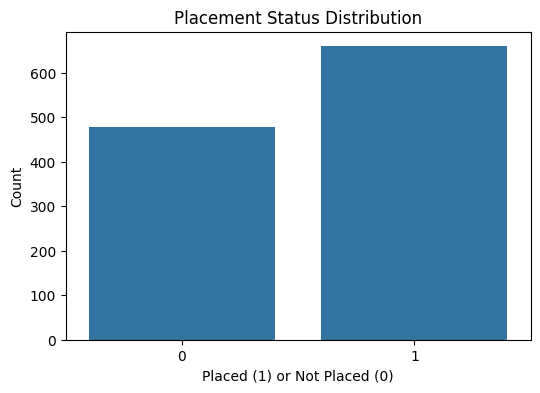

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='PlacedOrNot', data=df)
plt.title('Placement Status Distribution')
plt.xlabel('Placed (1) or Not Placed (0)')
plt.ylabel('Count')
plt.show()

### 2. Gender Distribution

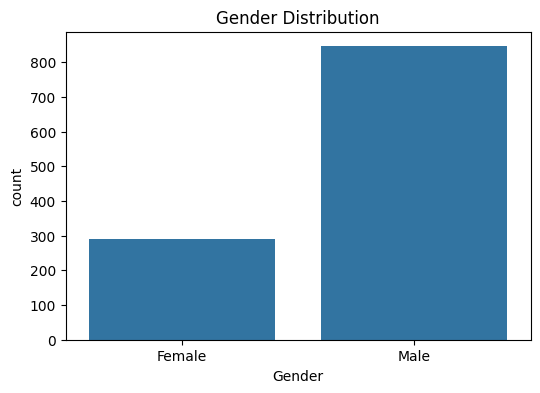

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

### 3. Placement Rate by Gender

C:\Users\B_Pal\AppData\Local\Temp\ipykernel_14276\3682471666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_gender = df.groupby('Gender')['PlacedOrNot'].mean().reset_index()


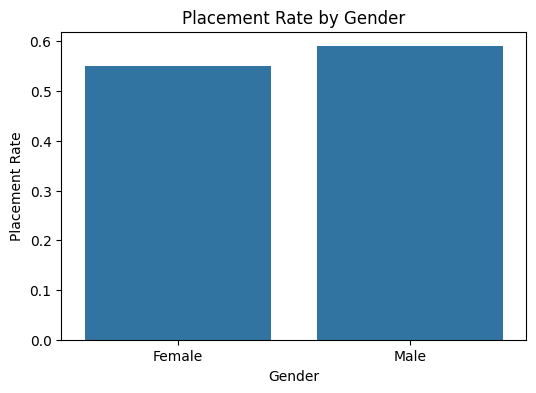

In [17]:
plt.figure(figsize=(6,4))
placement_gender = df.groupby('Gender')['PlacedOrNot'].mean().reset_index()
sns.barplot(x='Gender', y='PlacedOrNot', data=placement_gender)
plt.title('Placement Rate by Gender')
plt.ylabel('Placement Rate')
plt.show()

### 4. Stream Distribution

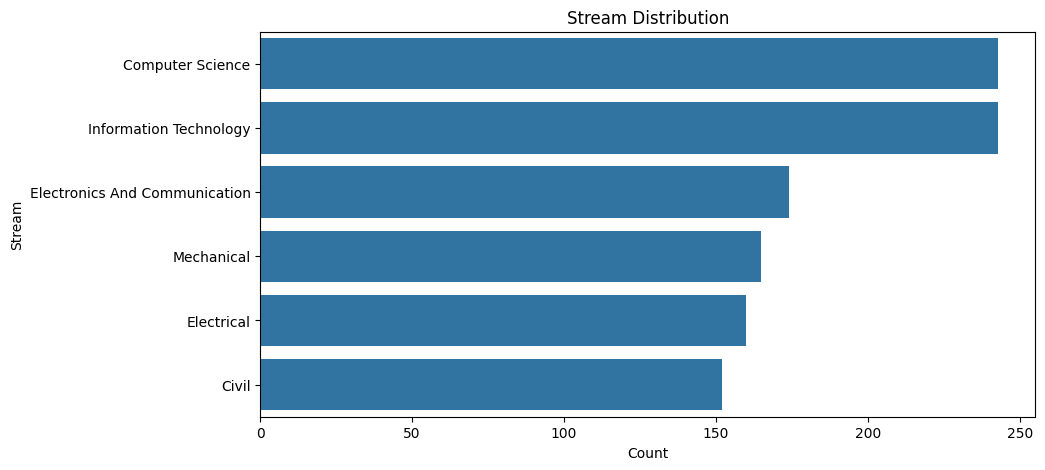

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(y='Stream', data=df, order=df['Stream'].value_counts().index)
plt.title('Stream Distribution')
plt.xlabel('Count')
plt.ylabel('Stream')
plt.show()

### 5. Placement Rate by Stream

C:\Users\B_Pal\AppData\Local\Temp\ipykernel_14276\1138262774.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_stream = df.groupby('Stream')['PlacedOrNot'].mean().sort_values(ascending=False).reset_index()


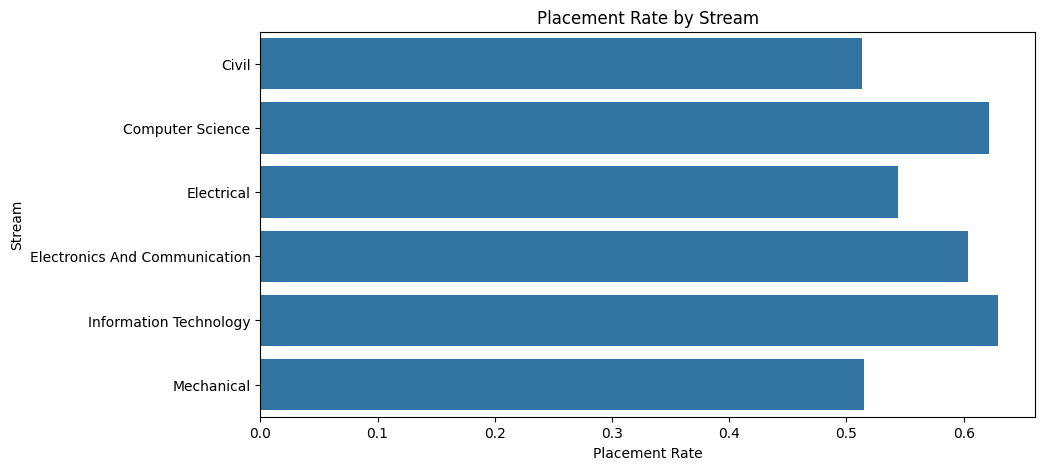

In [19]:
plt.figure(figsize=(10,5))
placement_stream = df.groupby('Stream')['PlacedOrNot'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='PlacedOrNot', y='Stream', data=placement_stream)
plt.title('Placement Rate by Stream')
plt.xlabel('Placement Rate')
plt.ylabel('Stream')
plt.show()

### 6. Age Distribution

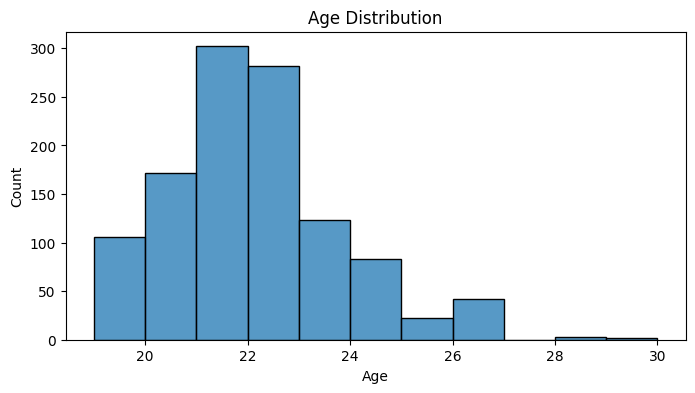

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=range(df['Age'].min(), df['Age'].max()+1), kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 7. Placement Rate by Age

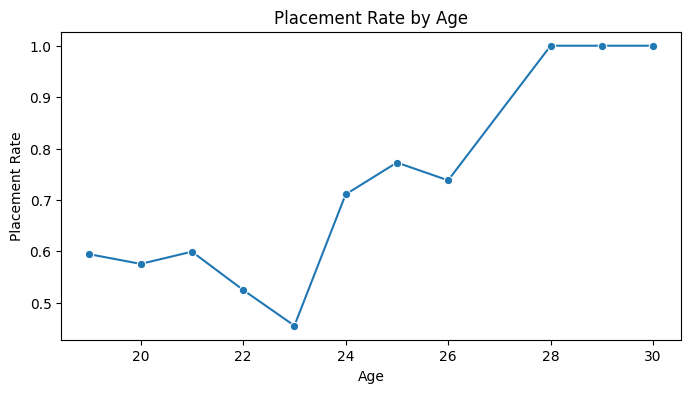

In [21]:
plt.figure(figsize=(8,4))
placement_age = df.groupby('Age')['PlacedOrNot'].mean().reset_index()
sns.lineplot(x='Age', y='PlacedOrNot', data=placement_age, marker='o')
plt.title('Placement Rate by Age')
plt.ylabel('Placement Rate')
plt.xlabel('Age')
plt.show()

### 8. CGPA Distribution

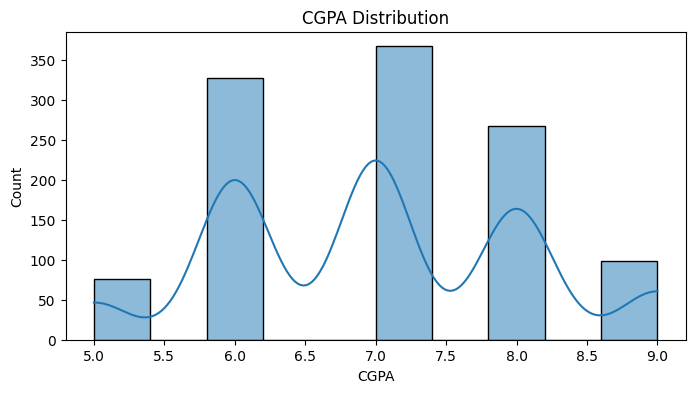

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['CGPA'], bins=10, kde=True)
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

### 9. CGPA vs Placement (Boxplot)

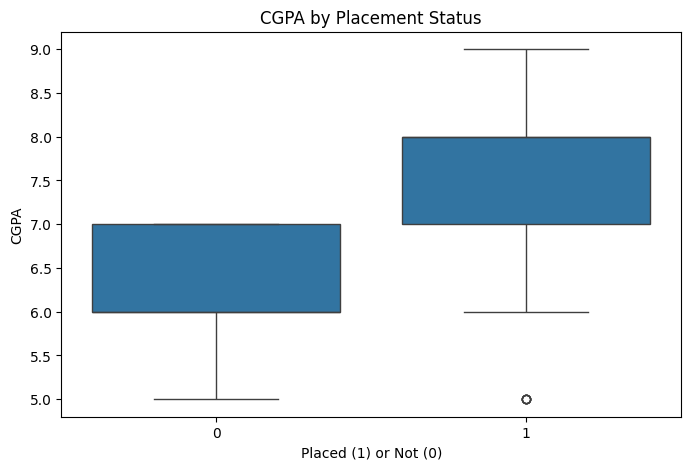

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PlacedOrNot', y='CGPA', data=df)
plt.title('CGPA by Placement Status')
plt.xlabel('Placed (1) or Not (0)')
plt.ylabel('CGPA')
plt.show()

### 10. Internships Distribution

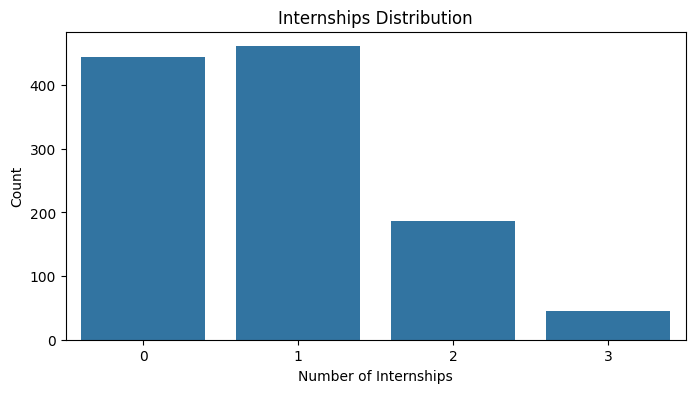

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x='Internships', data=df)
plt.title('Internships Distribution')
plt.xlabel('Number of Internships')
plt.ylabel('Count')
plt.show()

### 11. Placement Rate by Number of Internships

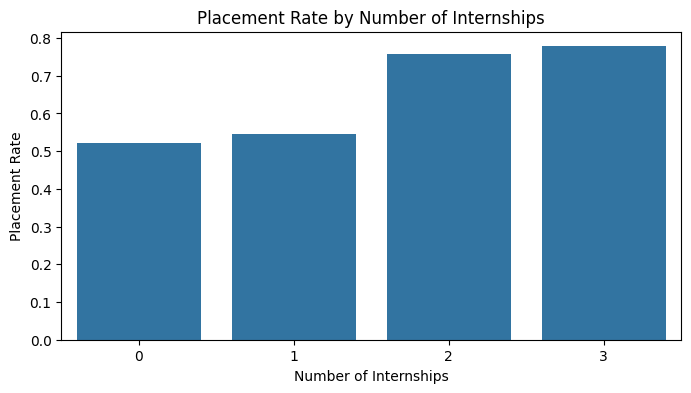

In [25]:
plt.figure(figsize=(8,4))
placement_internships = df.groupby('Internships')['PlacedOrNot'].mean().reset_index()
sns.barplot(x='Internships', y='PlacedOrNot', data=placement_internships)
plt.title('Placement Rate by Number of Internships')
plt.ylabel('Placement Rate')
plt.xlabel('Number of Internships')
plt.show()

### 12. Hostel Residency Distribution 

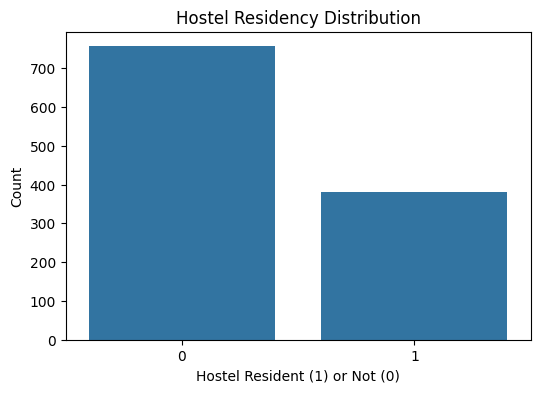

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='Hostel', data=df)
plt.title('Hostel Residency Distribution')
plt.xlabel('Hostel Resident (1) or Not (0)')
plt.ylabel('Count')
plt.show()

### 13. Placement Rate by Hostel Residency

C:\Users\B_Pal\AppData\Local\Temp\ipykernel_14276\2516694224.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_hostel = df.groupby('Hostel')['PlacedOrNot'].mean().reset_index()


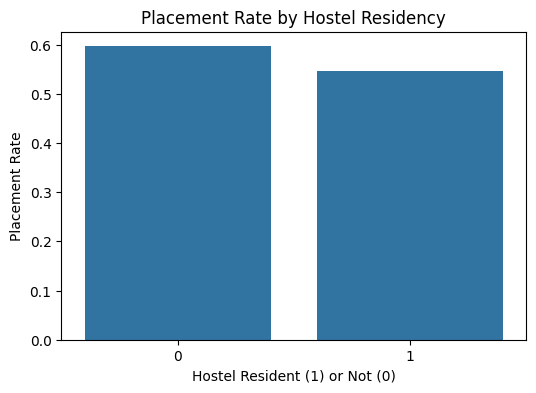

In [27]:
plt.figure(figsize=(6,4))
placement_hostel = df.groupby('Hostel')['PlacedOrNot'].mean().reset_index()
sns.barplot(x='Hostel', y='PlacedOrNot', data=placement_hostel)
plt.title('Placement Rate by Hostel Residency')
plt.ylabel('Placement Rate')
plt.xlabel('Hostel Resident (1) or Not (0)')
plt.show()

### 14. History of Backlogs Distribution

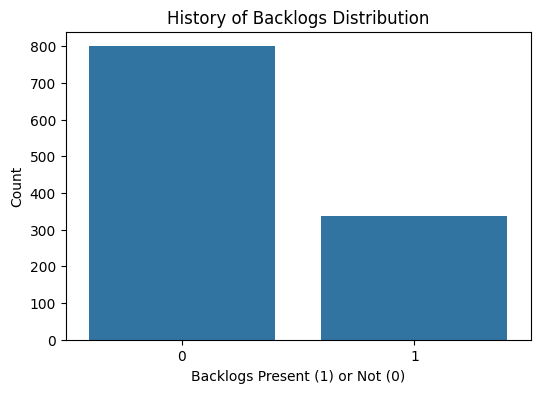

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='HistoryOfBacklogs', data=df)
plt.title('History of Backlogs Distribution')
plt.xlabel('Backlogs Present (1) or Not (0)')
plt.ylabel('Count')
plt.show()

### 15. Placement Rate by History of Backlogs

C:\Users\B_Pal\AppData\Local\Temp\ipykernel_14276\950162346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  placement_backlogs = df.groupby('HistoryOfBacklogs')['PlacedOrNot'].mean().reset_index()


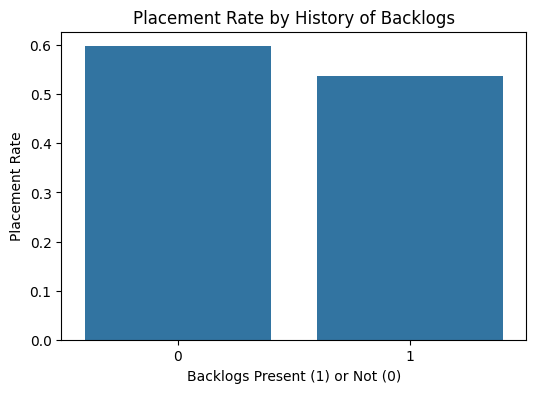

In [29]:
plt.figure(figsize=(6,4))
placement_backlogs = df.groupby('HistoryOfBacklogs')['PlacedOrNot'].mean().reset_index()
sns.barplot(x='HistoryOfBacklogs', y='PlacedOrNot', data=placement_backlogs)
plt.title('Placement Rate by History of Backlogs')
plt.ylabel('Placement Rate')
plt.xlabel('Backlogs Present (1) or Not (0)')
plt.show()

### 16. Correlation Heatmap of Numeric Features

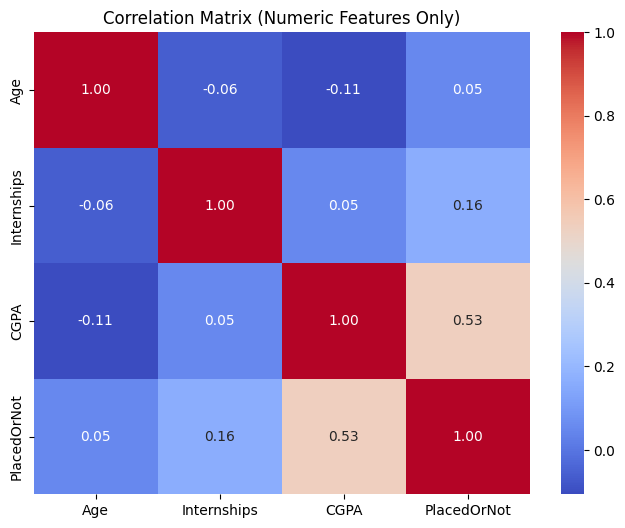

In [30]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

### 17. Pairplot of Key Features by Placement

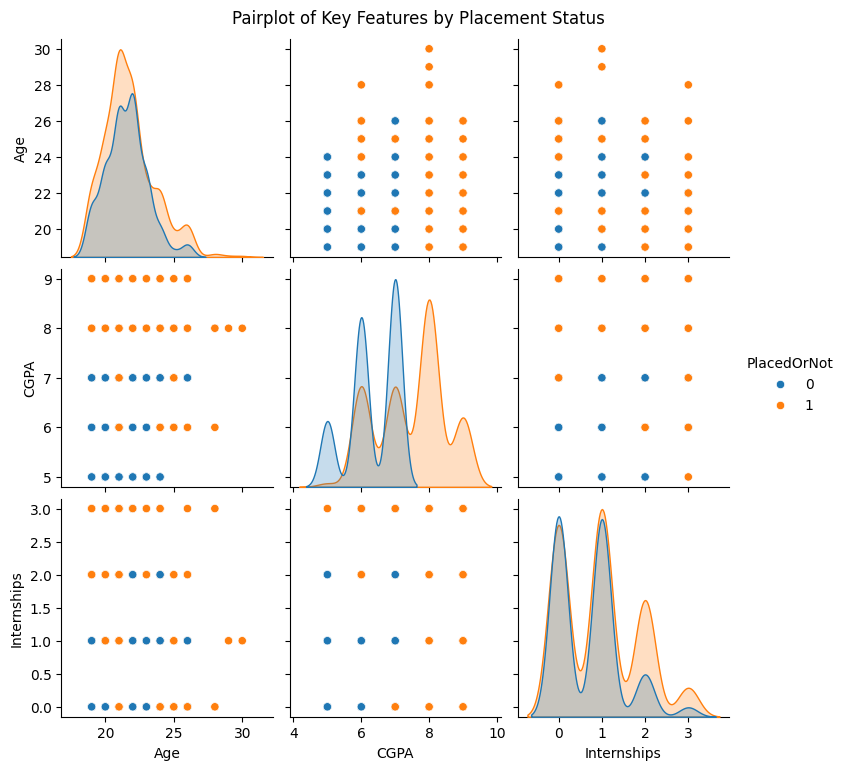

In [31]:
sns.pairplot(df, hue='PlacedOrNot', vars=['Age', 'CGPA', 'Internships'])
plt.suptitle('Pairplot of Key Features by Placement Status', y=1.02)
plt.show()